In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input

543 360


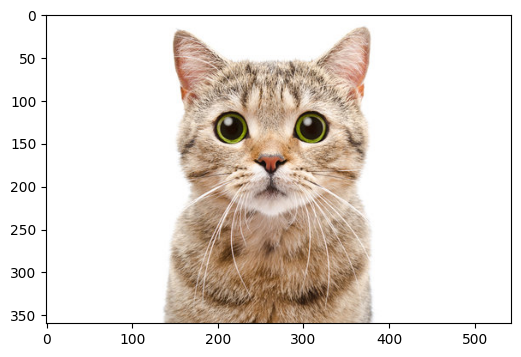

In [2]:
PATH = './data/'
# load an image
image = kimage.load_img(PATH+'image2.jpg')

plt.figure(figsize=(6,6))
plt.imshow(image)
print(image.width,image.height)

height = image.height
width = image.width

In [3]:
model = tf.keras.applications.VGG16(include_top=True, 
                                    weights='imagenet', 
                                    input_shape=(224, 224, 3))
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-05-28 18:38:50.057081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-28 18:38:50.057692: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


553467096/553467096 [==============================] - 68s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [4]:
for i in range(len(model.layers)):
  print(i,model.layers[i].name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


In [5]:
def featureExtraction(data_):
  for i in range(1,19):
    data_ = model.layers[i](data_)
  return data_   

def prediction(data_):
  for i in range(19,23):
    data_ = model.layers[i](data_)
  return data_                    

In [6]:
image_dim    = np.expand_dims(kimage.img_to_array(image), axis=0)
print(image_dim.shape)

image_feature = featureExtraction(image_dim)
print(image_feature.shape)

(1, 360, 543, 3)
(1, 11, 16, 512)


In [7]:
height = image_feature.shape[1]
width = image_feature.shape[2]
depth = image_feature.shape[3]

side = 7
prediction_data = []
for i in range(height-side+1):
  for j in range(width-side+1):
    patch = image_feature[:,i:i+side,j:j+side,:]
    result = prediction(patch)
    prediction_data.append((tf.math.reduce_max(result[0]).numpy(),i,j,
                            tf.math.argmax(result[0]).numpy()))
  

print(prediction_data[0])

(0.7010006, 0, 0, 285)


In [8]:
def getKey(item):
    return item[0]

sim_data_sorted = sorted(prediction_data, key=getKey, reverse=True)
print(sim_data_sorted[:3])

[(0.8384392, 3, 4, 281), (0.7964687, 3, 5, 281), (0.7834263, 3, 6, 281)]


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

height_fm = image_feature.shape[1]
width_fm = image_feature.shape[2]
height = image_dim.shape[1]
width = image_dim.shape[2]

#im = Image.open(PATH+'image3.jpg')
im = kimage.load_img(PATH+'image2.jpg')

plt.figure(figsize=(16,16))
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
scale_height = height//height_fm
scale_width  = width//width_fm

print(scale_height,scale_width,side)

for i in range(1): 
  rect = patches.Rectangle((sim_data_sorted[i][2]*scale_width, sim_data_sorted[i][1]*scale_height), 
                           side*scale_width, side*scale_height, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()

NameError: name 'image_feature' is not defined

InvalidArgumentError: input must be 4-dimensional[360,543,1] [Op:Conv2D]

In [ ]:
import numpy as np
import tensorflow as tf
import cv2

# Load the pre-trained model
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Load the image
image_path = 'path/to/image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess the image
preprocessed_image = tf.keras.applications.mobilenet_v2.preprocess_input(image)

# Expand dimensions to create a batch of size 1
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

# Run the object detection
predictions = model.predict(preprocessed_image)

# Get the top 5 predictions
top_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=5)[0]

# Display the top predictions
for pred in top_predictions:
    class_id, class_name, confidence = pred
    print(f"Class: {class_name}, Confidence: {confidence}")